In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
from uniflow.viz import Viz
from uniflow.node import Node
from uniflow.flow.expand_reduce_flow import ExpandReduceFlow

In [3]:
input = {"How are you?": "Fine.", "Who are you?": "I am Bob.", "Where are you?": "I am at home.", "What are you doing?": "Coding."}
root = Node(name="root", value_dict=input)
flow = ExpandReduceFlow()
flow.run(root)

In [4]:
print(root.flatten())

[{'name': 'root', 'value_dict': {'How are you?': 'Fine.', 'Who are you?': 'I am Bob.', 'Where are you?': 'I am at home.', 'What are you doing?': 'Coding.'}, 'prev_nodes': [], 'next_nodes': ['Expand_1', 'Expand_2'], 'is_end': False}, {'name': 'Expand_1', 'value_dict': {'How are you?': 'Fine.', 'Who are you?': 'I am Bob.'}, 'prev_nodes': ['root'], 'next_nodes': ['Reduce_1'], 'is_end': False}, {'name': 'Reduce_1', 'value_dict': {'How are you? Where are you?': 'Fine. I am at home.', 'Who are you? What are you doing?': 'I am Bob. Coding.'}, 'prev_nodes': ['Expand_1', 'Expand_2'], 'next_nodes': [], 'is_end': False}, {'name': 'Expand_2', 'value_dict': {'Where are you?': 'I am at home.', 'What are you doing?': 'Coding.'}, 'prev_nodes': ['root'], 'next_nodes': ['Reduce_1'], 'is_end': False}]


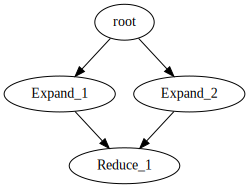

In [5]:
graph = Viz.to_digraph(root)
display(graph)